Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./card_transdata.csv')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
data.shape

(1000000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There is no missing data in the entire dataset.

In [6]:
fraud  = data['fraud'].value_counts()
px.pie(data['fraud'], names = fraud.index, values = fraud.values)

Only 8.74% are fraudulent transactions wich indicate that our data is highly unbalanced with concerning the target variable fraud

c:\Users\jackr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



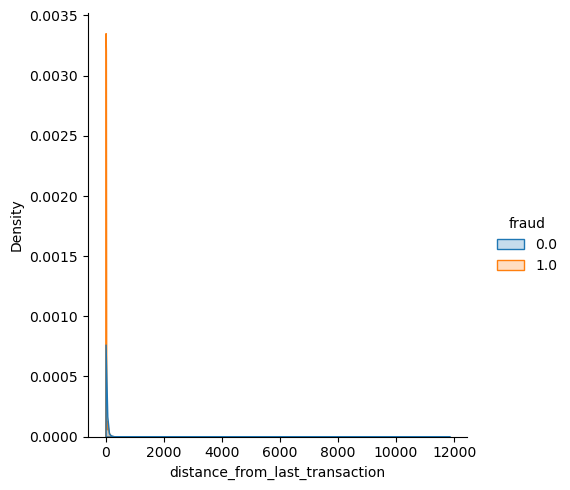

In [24]:
class0 = data.loc[data['fraud'] == 0, ['distance_from_last_transaction', 'fraud']]
class1 = data.loc[data['fraud'] == 1, ['distance_from_last_transaction', 'fraud']]

combined_data = pd.concat([class0, class1])

# Plot the distribution
sns.displot(data=combined_data, x='distance_from_last_transaction', hue='fraud', kind='kde', fill=True)

All fraudulent transactions have a distance of 0 from the last transaction, while non-fraudulent transactions exhibit a wide range of distances from the last transaction

In [38]:
class0 = data.loc[data['fraud'] == 0, ['online_order', 'fraud']]
o_order0 = class0['online_order'].value_counts()
px.pie(class0, names = o_order0.index, values = o_order0.values)

In [39]:
class1 = data.loc[data['fraud'] == 1, ['online_order', 'fraud']]
o_order1 = class1['online_order'].value_counts()
px.pie(class1, names = o_order1.index, values = o_order1.values)


As expected, the majority of fraudulent transactions were online orders, accounting for 94.6%.

In [40]:
class0 = data.loc[data['fraud'] == 0, ['used_chip', 'fraud']]
used_chip0 = class0['used_chip'].value_counts()
px.pie(class0, names = used_chip0.index, values = used_chip0.values)

In [42]:
class1 = data.loc[data['fraud'] == 1, ['used_chip', 'fraud']]
used_chip1 = class1['used_chip'].value_counts()
px.pie(class1, names = used_chip1.index, values = used_chip1.values)

A high percentage of fraudulent transactions were conducted using a chip (credit card)